# Matematikai algoritmusok és felfedezések II - Második gyakorlat

## SymPy

In [327]:
import sympy as sym

### Szimbólumok

#### Beépített szimbólumok

In [328]:
sym.I

I

In [329]:
sym.oo

oo

In [330]:
sym.pi

pi

In [331]:
sym.E

E

#### Saját szimbólumok

In [332]:
x = sym.Symbol("x")
x

x

In [333]:
y = sym.S(y)
y

y

In [334]:
a, b, g = sym.symbols("α β γ")
a

α

In [335]:
type(x)

sympy.core.symbol.Symbol

In [336]:
sym.sin(a+1)**3/3

sin(α + 1)**3/3

#### Kifejezések

In [399]:
x, y = sym.symbols("x y")
exp = x**2-1/y
exp

x**2 - 1/y

In [400]:
exp = sym.Add(exp, 1/x)
exp

x**2 - 1/y + 1/x

In [401]:
exp = sym.Mul(exp, x)
exp

x*(x**2 - 1/y + 1/x)

In [402]:
exp = sym.Pow(exp, -1/2)
exp

(x*(x**2 - 1/y + 1/x))**(-0.5)

#### Behelyettesítés és kiértékelés

In [337]:
# Behelyettesítem a kifejezésbe a π-t
exp = sym.sin(x)/(x**2)
exp.subs(x, sym.pi)

0

In [338]:
# Ugyanez több változóval (szimbólummal) is működik
x, y = sym.symbols("x y")
exp = sym.sin(x)*sym.cos(y) + sym.exp(x*y)
exp.subs([(x, sym.pi), (y, sym.pi)])

exp(pi**2)

In [339]:
# Kiértékelem
sub = exp.subs([(x, sym.pi), (y, sym.pi)])
sub.evalf()

19333.6890743651

In [340]:
# Kiértékelem 100 jegyig
sub.evalf(100)

19333.68907436514532291683302501091567284780813612372709863296305763460541122225215370776656342688559

In [341]:
# Egyéb kifejezéseket is ki lehet értékelni
sym.sqrt(2).evalf()

1.41421356237310

### Egyszerűsítés

In [413]:
x = sym.symbols("x")
f = (x**3-3*x**2+4)/(x**2-1)
f

(x**3 - 3*x**2 + 4)/(x**2 - 1)

In [414]:
# Egyszerűsítés
sym.simplify(f)

(x**2 - 4*x + 4)/(x - 1)

In [416]:
# Kibontás
sym.expand((x-1)**3)

x**3 - 3*x**2 + 3*x - 1

In [417]:
# Gyöktényezős alak
sym.factor(x**3-3*x**2+3*x-1)

(x - 1)**3

In [418]:
# Parciális törtekre bontás
sym.apart(f)

x - 3 + 1/(x - 1)

### Egyenletek megoldása

#### Hogyan oldjuk meg az alábbi egyenletet?

\[
    3x = 5
\]

In [342]:
sol = sym.solve(3*x-5, x)
sol

[5/3]

#### Hogyan oldjuk meg a következő egyenletrendszert?
\[
    3x + 2y = 5\\
    2x - y = 3
\]

In [343]:
x, y = sym.symbols("x y")
sol = sym.solve([3*x+2*y-5, 2*x-y-3], x, y)
sol

{x: 11/7, y: 1/7}

#### Hogyan oldjunk meg nem-lineáris egyenletet?

Mik a gyökei az alábbi polinomnak?
\[
    p(x) = x^2-x-1
\]

In [344]:
sol = sym.solve(x**2-x-1, x)
sol

[1/2 - sqrt(5)/2, 1/2 + sqrt(5)/2]

In [345]:
sol = sym.solve(sym.sin(x)-1, x)
sol

[pi/2]

#### Egyenletek

In [379]:
eq1 = sym.Equality(x+y, 1)
eq2 = sym.Equality(x-y, -1)
eq1

Eq(x + y, 1)

In [380]:
eq1.lhs

x + y

In [381]:
sym.solve([eq1, eq2], [x, y])

{x: 0, y: 1}

### Mátrixok

In [453]:
M = sym.Matrix([[1, 0], [0, -1]])
M

Matrix([
[1,  0],
[0, -1]])

In [455]:
x = sym.symbols("x")
D = sym.diag(x, x**2, x**3)
D

Matrix([
[x,    0,    0],
[0, x**2,    0],
[0,    0, x**3]])

In [456]:
M.det()

-1

In [458]:
M.trace()

0

In [460]:
M.eigenvals()

{1: 1, -1: 1}

In [465]:
M.eigenvects()

[(-1,
  1,
  [Matrix([
   [0],
   [1]])]),
 (1,
  1,
  [Matrix([
   [1],
   [0]])])]

### Határértékek

#### Hogyan számoljuk ki az alábbi határértéket?
$$
    \lim_{x\to\infty}\left(1+\frac{1}{x}\right)^x
$$

In [349]:
sym.limit((1+1/x)**x, x, sym.oo)

E

In [350]:
sym.limit(sym.limit((1+1/x)**x * (1+1/y)**(-y), x, sym.oo), y, sym.oo)

1

### Differenciálás

#### Hogyan kell deriválni az alábbi függvényt?

$$
    f(x) = x^3+\frac{1}{x^2}-\sin{x}
$$

In [351]:
sym.diff(x**3+1/x**2-sym.sin(x), x)

3*x**2 - cos(x) - 2/x**3

### Integrálás

#### Hogyan kell kiszámolni az alábbi függvény primitívfüggvényét?

$$
    f(x) = x^3-2x^2+1
$$

In [352]:
sym.integrate(x**3-2*x+1)

x**4/4 - x**2 + x

#### És a határozott integrálját $a$ és $b$ között?

In [353]:
a, b = sym.symbols("a b")
sym.integrate(x**3-2*x+1, (x, a, b))

-a**4/4 + a**2 - a + b**4/4 - b**2 + b

In [354]:
sym.integrate(x**3-2*x+1).subs(x, b) - sym.integrate(x**3-2*x+1).subs(x, a)

-a**4/4 + a**2 - a + b**4/4 - b**2 + b

In [355]:
exp = (1/sym.sqrt(2*sym.pi))*sym.exp(-x**2/2)
sym.integrate(exp, (x, -sym.oo, y)).subs(y, 0)

1/2

### Differenciálegyenletek
Oldjuk meg az alábbi kezdeti érték problémát!

\begin{equation}
    \begin{array}{rcl}
        \ddot{y}(t) + \dot{y}(t)+5y(t)& = & \sin{t} \\
        \dot{y}(0) & = & 0 \\
        y(0) & = & 0
    \end{array}
\end{equation}

In [426]:
y = sym.Function("y")
t = sym.Symbol("t")

yy = sym.diff(y(t), t)
yyy = sym.diff(yy, t)
ys = sym.dsolve(yyy+yy+5*y(t)-sym.sin(t),
                y(t),
                ics={y(0) : 2,
                     yy.subs(t, 0) : 0})
ys

Eq(y(t), (27*sqrt(19)*sin(sqrt(19)*t/2)/323 + 35*cos(sqrt(19)*t/2)/17)*exp(-t/2) + 4*sin(t)/17 - cos(t)/17)

In [427]:
type(ys)

sympy.core.relational.Equality

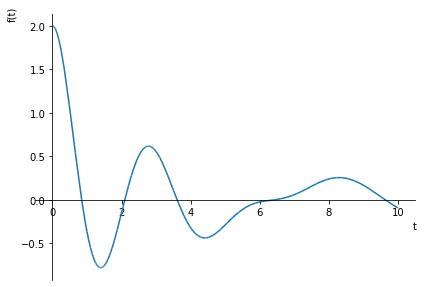

In [428]:
from sympy.plotting import plot, plot3d
plot(ys.rhs, (t, 0, 10))

## Feladatok

In [20]:
α = 2

### Nem-lineáris algebrás feladat
Adottak
$$
    C_i = \left\{(x,y)\in\mathbb{R}^2\left| (x-x_i)^2+(y-y_i)^2 = r_i^2\right.\right\}\ \forall i=1,2
$$
körök a síkon. Számítsd ki a metszéspontjaik koordinátáit. _Bónusz:_ Ábrázold a köröket és a metszéspontokat!

In [17]:
# Data
x1, y1, r1 = 1, 0, 5
x2, y2, r2 = 2, 2, 4
x, y = sym.symbols("x y")

# Equations
C1 = (x-x1)**2+(y-y1)**2-r1**2
C2 = (x-x2)**2+(y-y2)**2-r2**2

# Solution
sol = sym.solve([C1, C2], [x,y], dict=True)

xs = [p[x] for p in sol]
ys = [p[y] for p in sol]


In [18]:
sol

[{x: 12/5 - 4*sqrt(19)/5, y: 2*sqrt(19)/5 + 14/5},
 {x: 12/5 + 4*sqrt(19)/5, y: 14/5 - 2*sqrt(19)/5}]

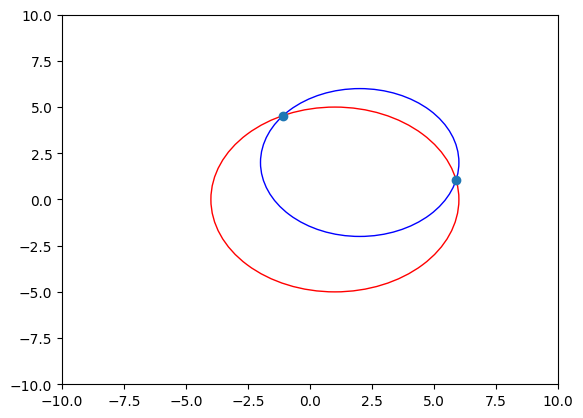

In [19]:
import matplotlib.pyplot as plt

circle1 = plt.Circle((x1, y1), r1, color='r', fill=False)
circle2 = plt.Circle((x2, y2), r2, color='b', fill=False)

fig, ax = plt.subplots()
ax.add_patch(circle1)
ax.add_patch(circle2)

ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
ax.scatter(xs, ys)
plt.show()

### Mátrixos feladat
Adj képletet $2\times 2$-as mátrixok sajátértékeinek a kiszámítására!

In [24]:
a, b, c, d = sym.symbols("a b c d")
M = sym.Matrix([[a, b],
                [c, d]])
l = sym.symbols("λ")
L = sym.diag(l,l)
l1, l2  = sym.solve(sym.det(M - L), l)
l1.subs([(a, 2), (b, 1), (c, 0), (d, 1)]), l2.subs([(a, 2), (b, 1), (c, 0), (d, 1)])

(1, 2)

In [23]:
l1, l2

(a/2 + d/2 - sqrt(a**2 - 2*a*d + 4*b*c + d**2)/2,
 a/2 + d/2 + sqrt(a**2 - 2*a*d + 4*b*c + d**2)/2)

In [25]:
M.eigenvals()

{a/2 + d/2 - sqrt(a**2 - 2*a*d + 4*b*c + d**2)/2: 1,
 a/2 + d/2 + sqrt(a**2 - 2*a*d + 4*b*c + d**2)/2: 1}

### Deriválós feladat

Van $P$ méter drótkerítésem, és szeretnék a kecskéimnek lekeríteni az udvaromból ennek segítségével minél nagyobb, téglalap alakú területet. Hogyan mérjem ki az oldalait?

In [26]:
def max_area_rectangle(P):
    # Your code here
    x = sym.symbols("x")
    X = sym.solve(sym.diff(-x**2+x*P/2), x)[0]
    Y = P/2 - X
    return float(X), float(Y)

In [28]:
max_area_rectangle(28)

(7.0, 7.0)

Le akarok választani $A$ területet a farmomnak, azonban nincs nagyon sok pénzem, így a lehető legkevesebb kerítést szeretném felhasználni. Hogyan mérjem ki ekkor az oldalakat?

In [29]:
def min_perimeter_rectangle(A):
    # Your code here
    x = sym.symbols("x")
    X = sym.Abs(sym.solve(sym.diff(2*x+2*A/x), x)[0])
    Y = A/X
    return float(X), float(Y)

In [30]:
min_perimeter_rectangle(49)

(7.0, 7.0)

### Integrálós feladat

Írj egy függvényt, ami kiszámolja, hogy egy standard normális eloszlású valószínűségi változó mekkora valószínűséggel kisebb, mint egy inputként kapott szám! _(Vagyis írd meg a standard normális eloszlás eloszlásfüggvényét)_

A standard normális eloszlás sűrűségfüggvénye:

$$
    X\sim \mathcal{N}(0,1)\implies f_X(x)=\frac{1}{\sqrt{2\pi}}\mathrm{e}^{-\frac{x^2}{2}}
$$

In [31]:
def standard_normal_distribution(t):
    x = sym.S("x")
    p = sym.integrate((1/sym.sqrt(2*sym.pi))*sym.exp(-(x**2)/2), (x, -sym.oo, t))
    return p.evalf()

In [32]:
standard_normal_distribution(0)

0.500000000000000

### Lánctörtek
* Készíts egy függvényt, amely kiszámolja egy $\frac{n}{d}$ alakú racionális szám lánctörtreprezentációját, ami $\left[a_0,a_1,\dots,a_n\right]$, ahol \[
    \frac{n}{d} = \frac{1}{\frac{1}{\frac{1}{\frac{1}{a_n}+\ddots}+a_2}+a_1}+a_0,
\]  és minden $i=0,\dots,n$-re $a_i\in\mathbb{Z}$. _Bónusz:_ Legyen képes a függvény tetszőleges valós számot is         közelíteni lánctörttel. Mi lenne $\sqrt{2}$ egy közelítése?


* Készíts egy függvényt, amely a fenti _szép_ lánctört alakban ábrázolja a számot az $\left[a_0,a_1,\dots,a_n\right]$ reprezentáció alapján. _Bónusz:_ ugyanez e függvény legyen képes az eredeti $\frac{n}{d}$ reprezentációra megjelenítésére is.

In [16]:
r = 9/5
N = [r]
D = [1]
A = []

while D[-1] != 0:
    d = D[-1]
    n = N[-1]
    a = (n/d)//1
    A.append(a)
    N.append(d)
    D.append(n%d)

print(A)

[1.0, 1.0, 4.0, 900719925474099.0]


In [2]:
import sympy as sym

def to_cont_frac(r, max_it = sym.oo):
    N = [r]
    D = [1]
    A = []

    it = 0
    while D[-1] != 0 and it < max_it:
        d = D[-1]
        n = N[-1]
        a = (n / d) // 1
        A.append(a)
        N.append(d)
        D.append(n % d)
        it += 1
    return A

In [3]:
def list_to_frac(l, evaluate = False):
    expr = sym.Integer(0)
    last = True
    for i in l[-1:0:-1]:
        expr = sym.Add(i, expr, evaluate=last or evaluate)
        expr = sym.Pow(expr, -1, evaluate=evaluate)
        last=False
    return sym.Add(l[0], expr, evaluate=evaluate)

In [4]:
# A = to_cont_frac(sym.Rational(3363, 2378))
A = to_cont_frac(sym.sqrt(2), max_it=20)
print(A)

[1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [11]:
list_to_frac(A, evaluate = False)#.evalf(50)

1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/2 + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 2) + 1

In [10]:
B = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
list_to_frac(B, evaluate = False)#.evalf(100)

1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1/(1 + 1/1) + 1) + 1) + 1) + 1) + 1) + 1) + 1) + 1) + 1) + 1) + 1) + 1) + 1) + 1) + 1) + 1

In [7]:
4181/2584

1.618034055727554

In [8]:
((1+sym.sqrt(5))/2).evalf(100)

1.618033988749894848204586834365638117720309179805762862135448622705260462818902449707207204189391137